In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1270,2020-08-12,United Kingdom,312851.0,312789.0,46595.0,46526.0,62.0,69.0
1271,2020-08-12,Germany,217772.0,218519.0,9209.0,9207.0,-747.0,2.0
1272,2020-08-12,Iran,332850.0,331189.0,18839.0,18800.0,1661.0,39.0
1273,2020-08-12,Turkey,243048.0,243180.0,5872.0,5873.0,-132.0,-1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  4759.534117647059
RMSE =  17360.8236262106


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  285.21803921568625
RMSE =  677.3950537341776


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  29587.008196721312
RMSE =  53293.970450868386
-- World performances for deaths --
MAE =  1542.172131147541
RMSE =  1885.9568754522395


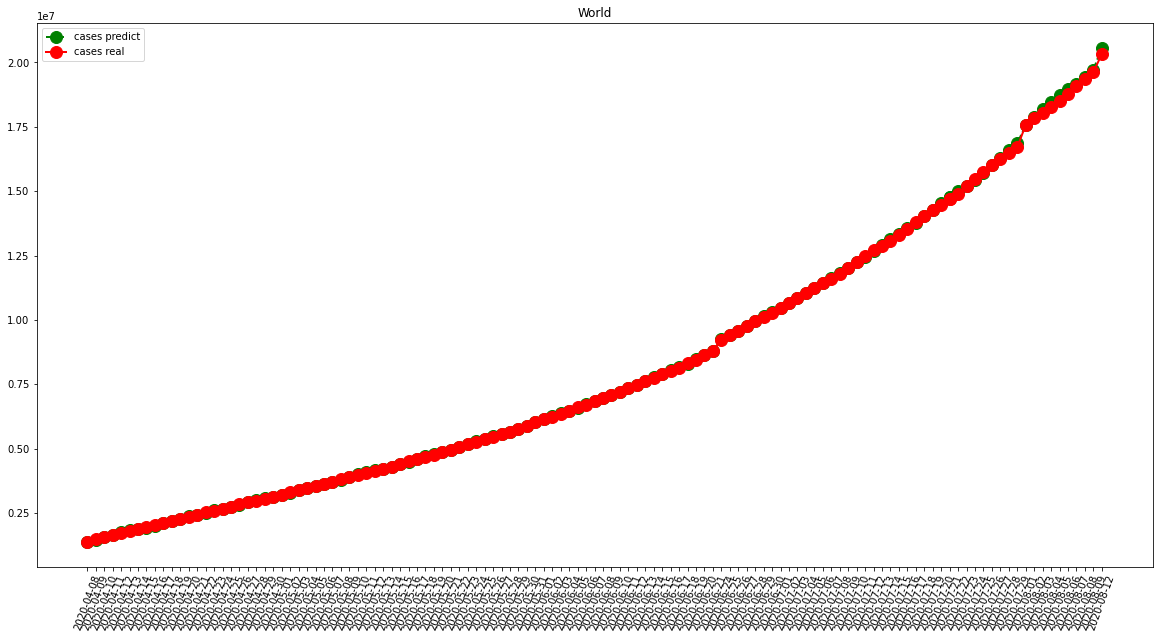

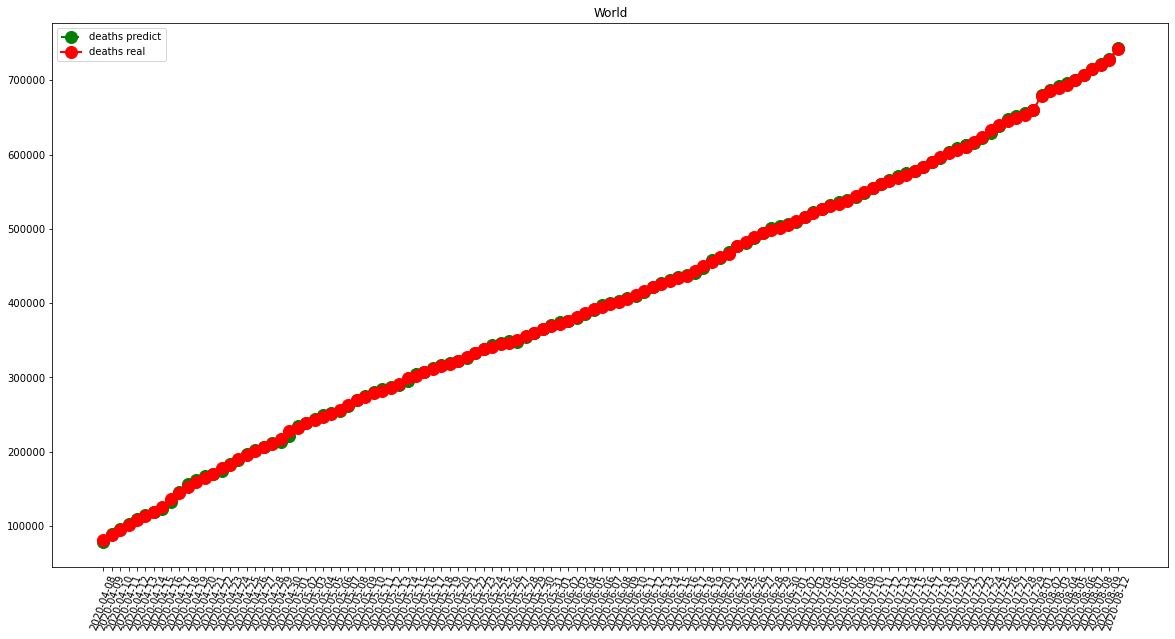

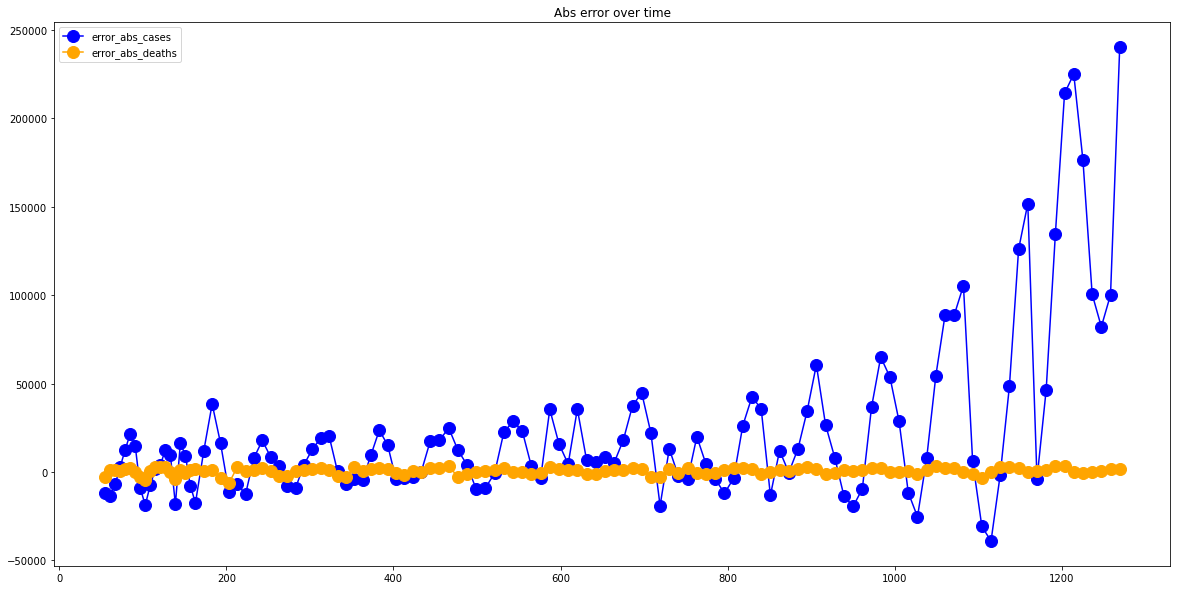

In [7]:
visShow("World")

-- France performances for cases --
MAE =  878.3787878787879
RMSE =  1373.8311450653298
-- France performances for deaths --
MAE =  138.3939393939394
RMSE =  291.79475975106516


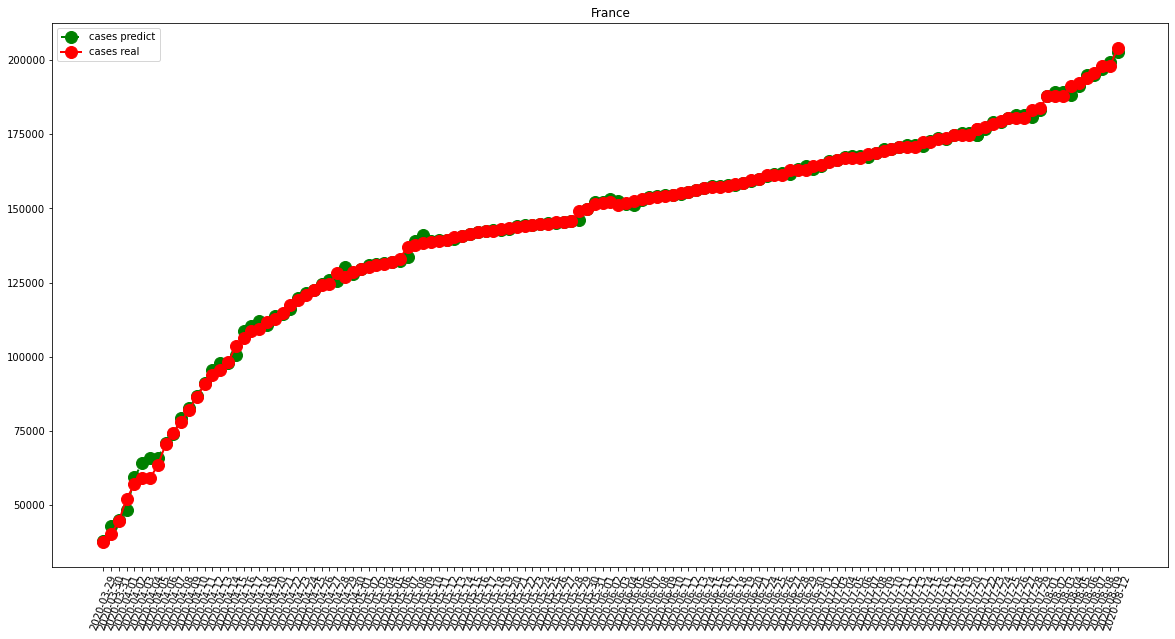

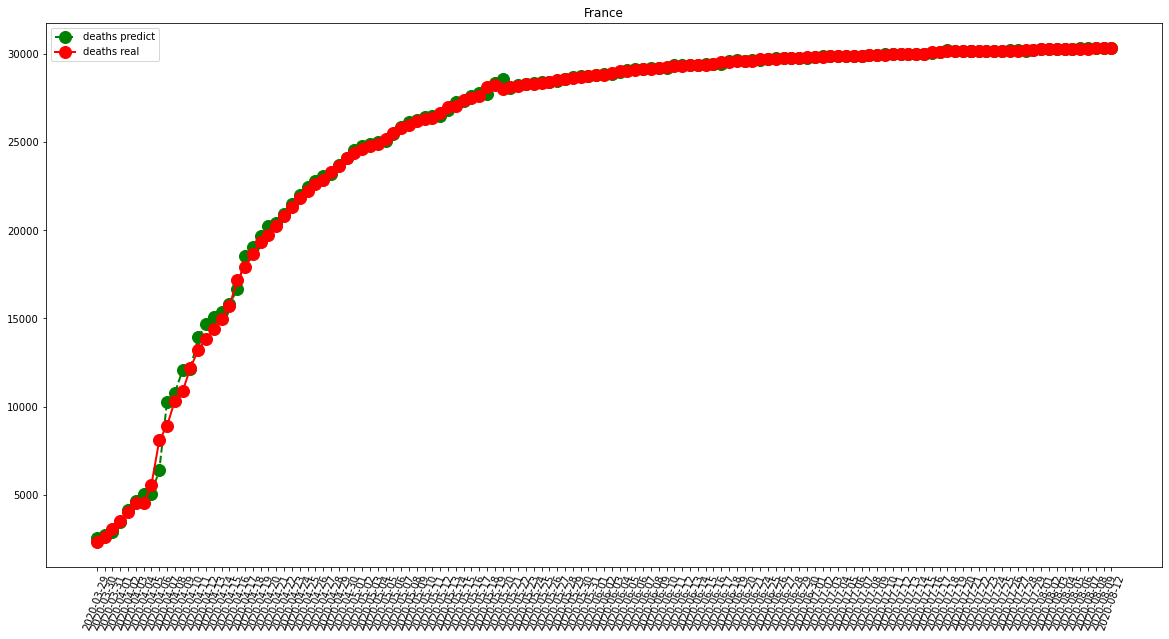

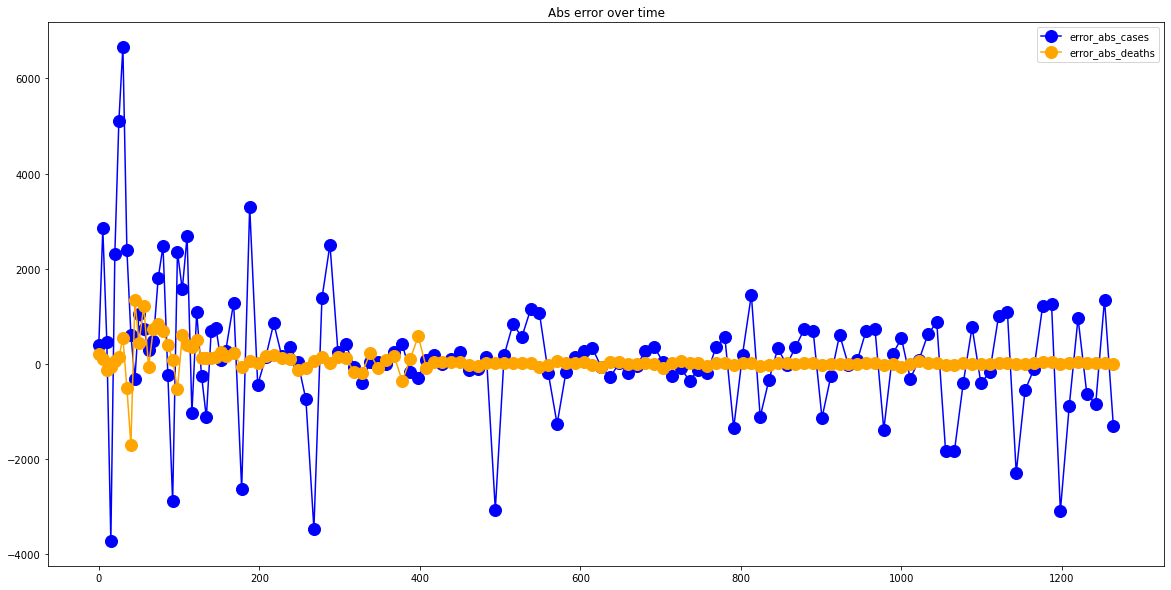

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  313.75757575757575
RMSE =  477.5312142740625
-- Italy performances for deaths --
MAE =  79.4469696969697
RMSE =  257.66758300828866


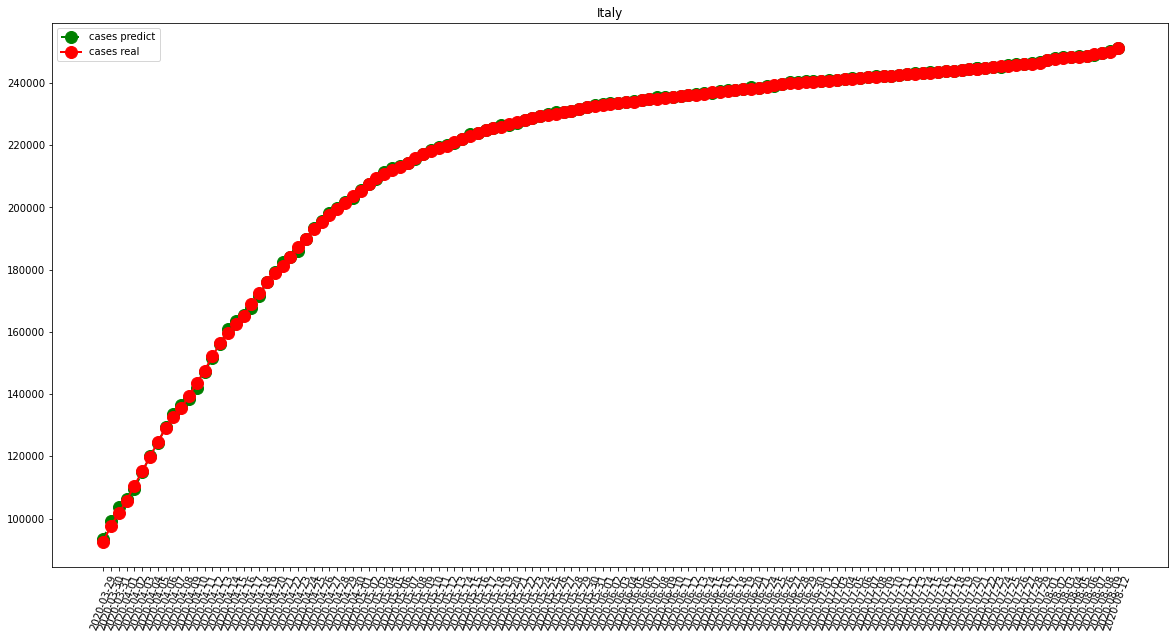

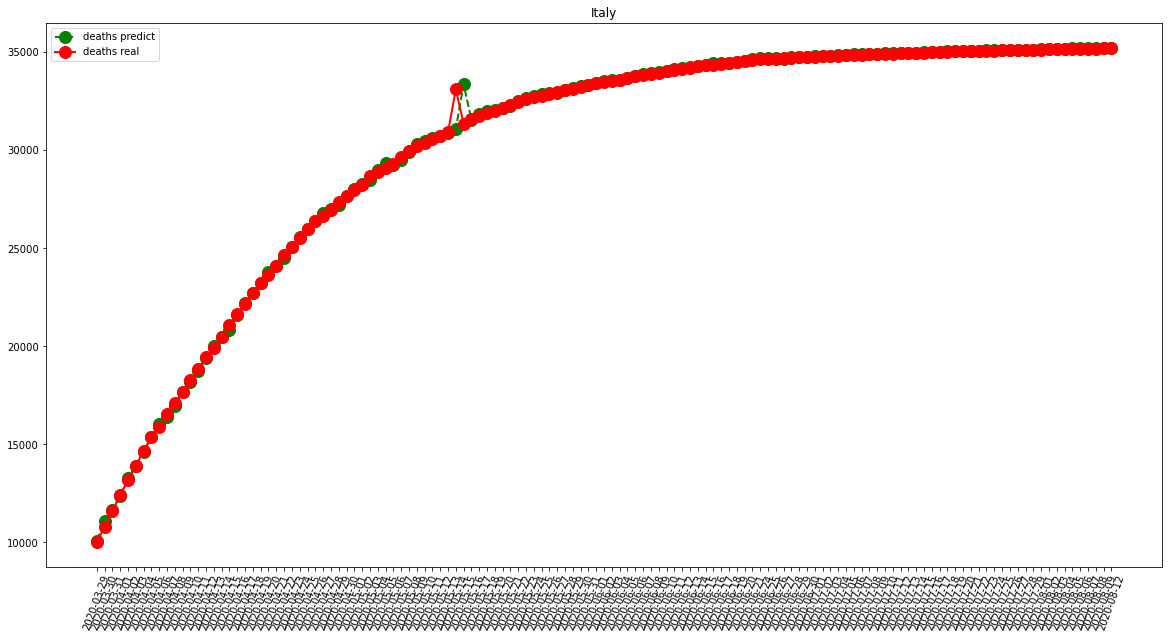

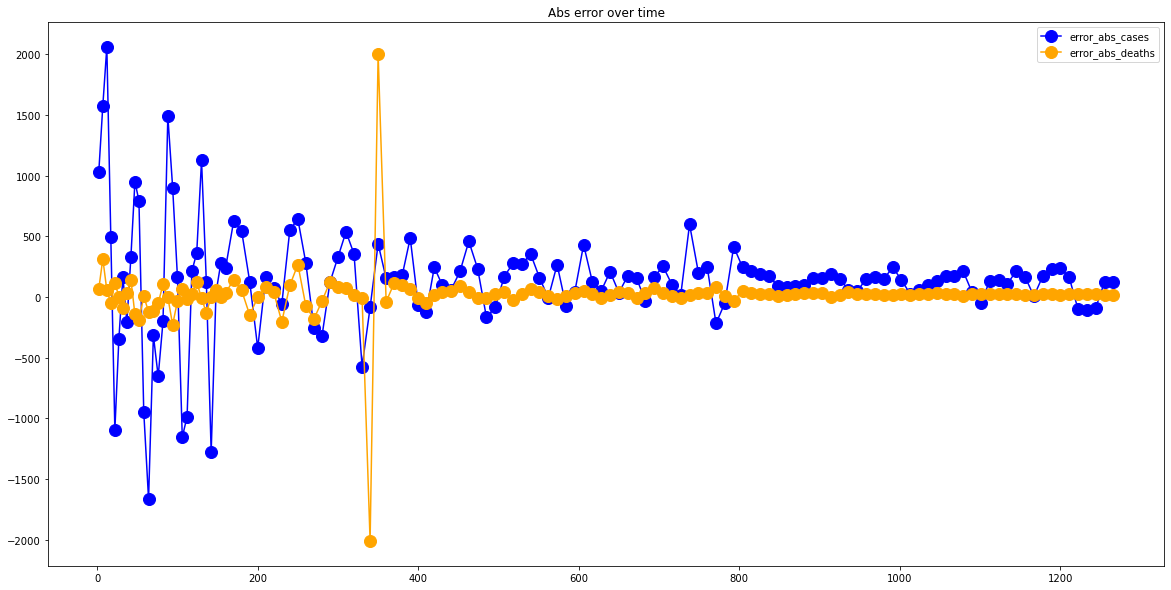

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1193.9469696969697
RMSE =  2299.054448259242
-- Spain performances for deaths --
MAE =  140.52272727272728
RMSE =  353.3397476547569


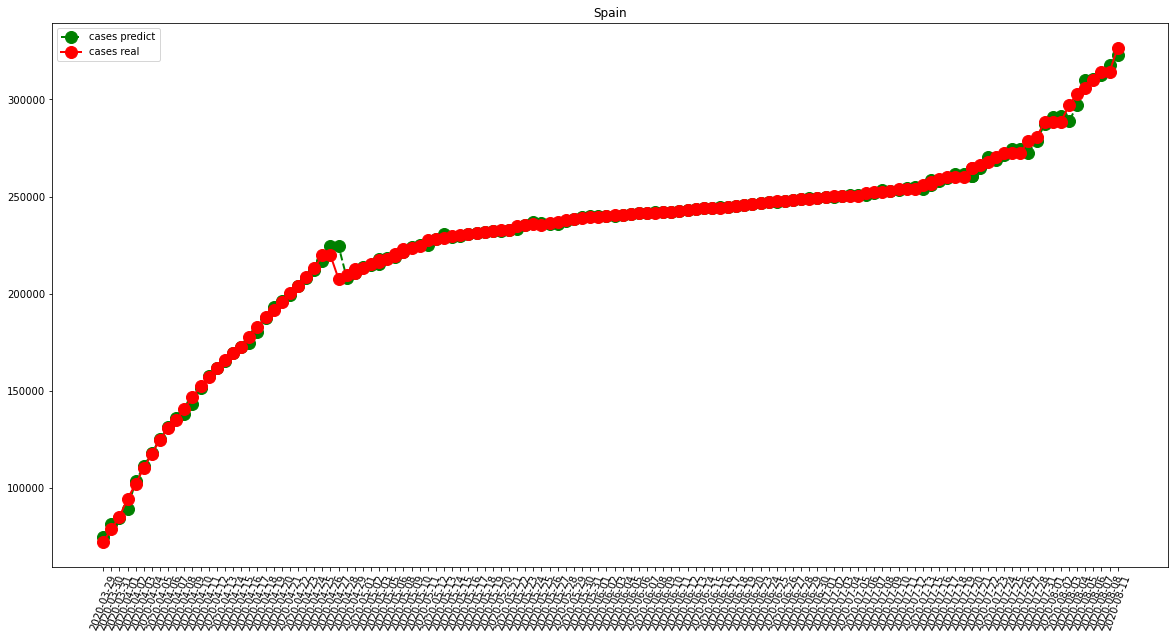

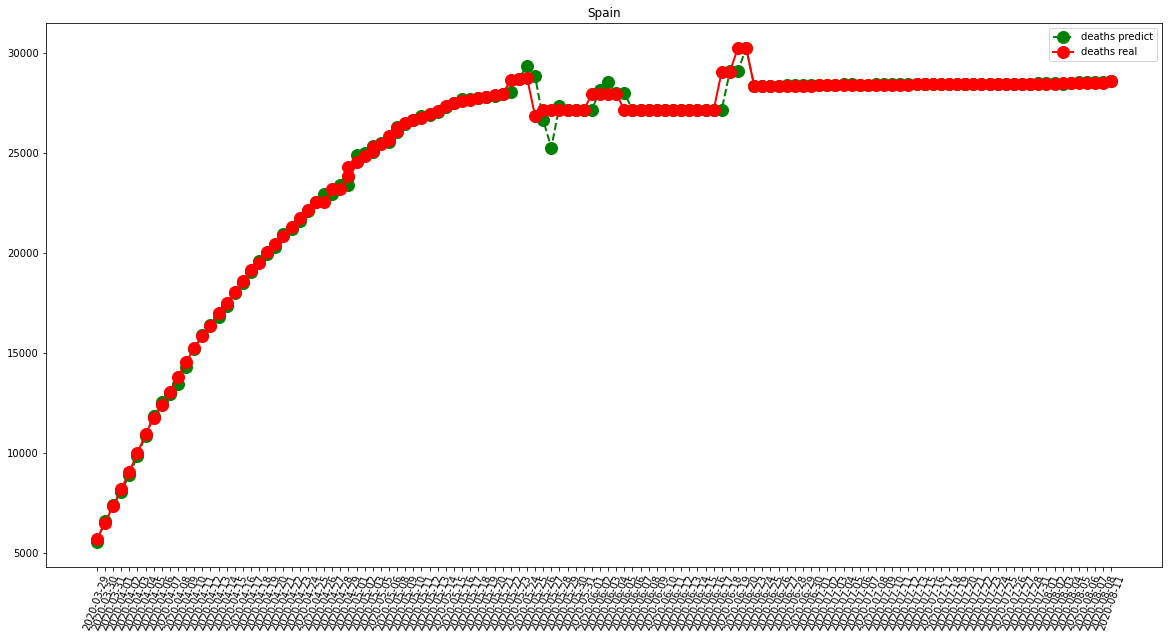

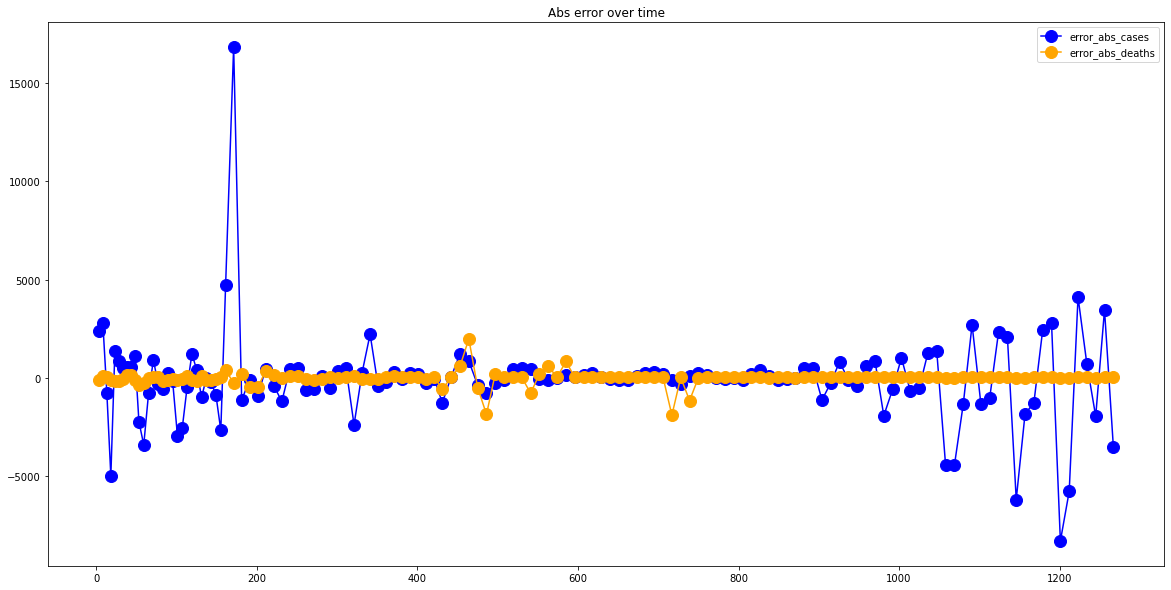

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  7400.295454545455
RMSE =  10906.77820627655
-- United States performances for deaths --
MAE =  500.8636363636364
RMSE =  716.8514701826525


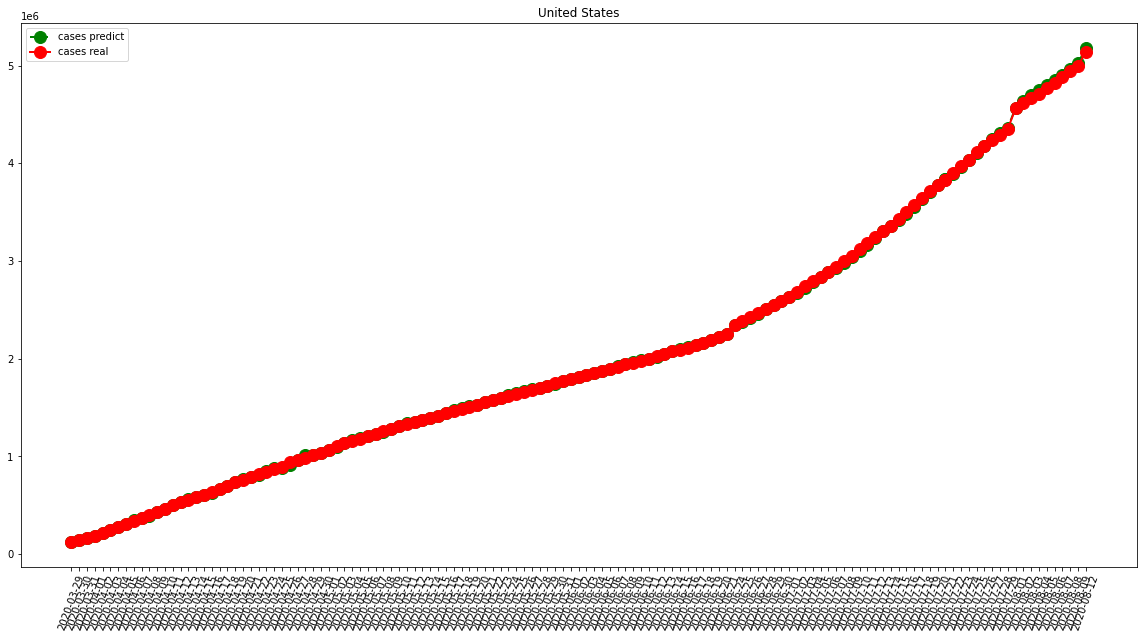

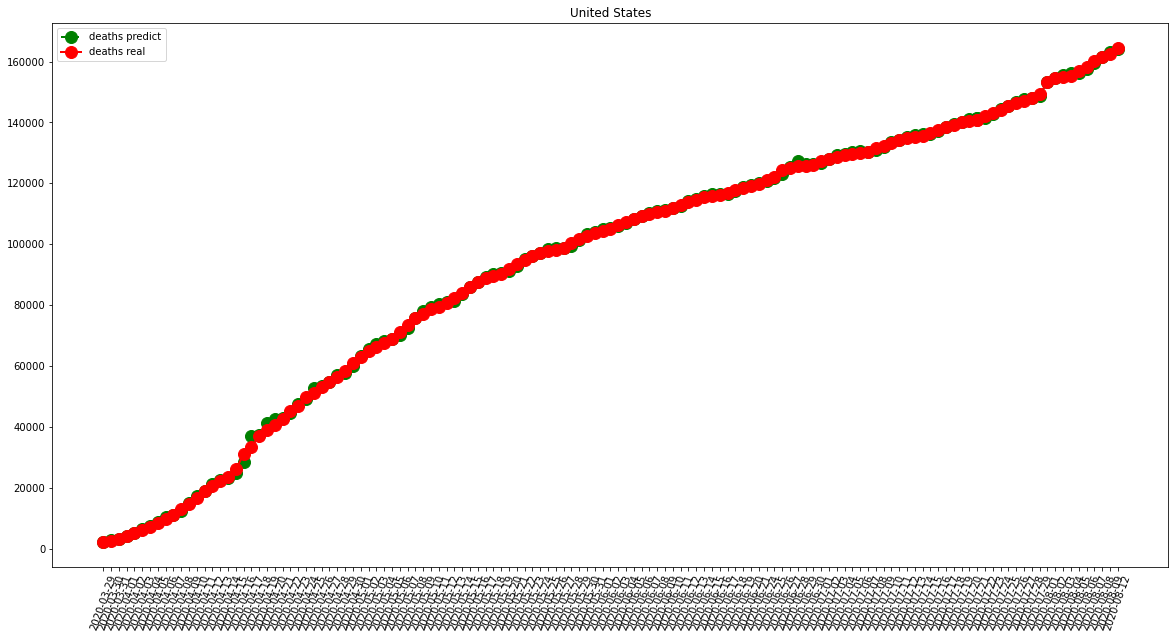

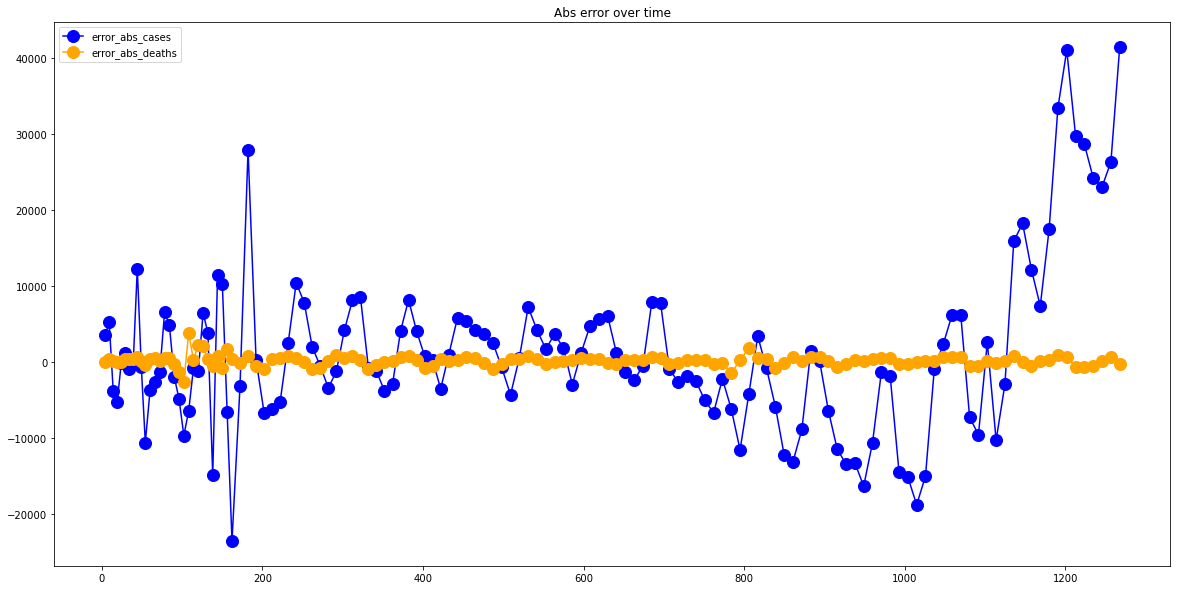

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  74.1590909090909
RMSE =  103.70313837628498
-- China performances for deaths --
MAE =  30.810606060606062
RMSE =  136.6548683007782


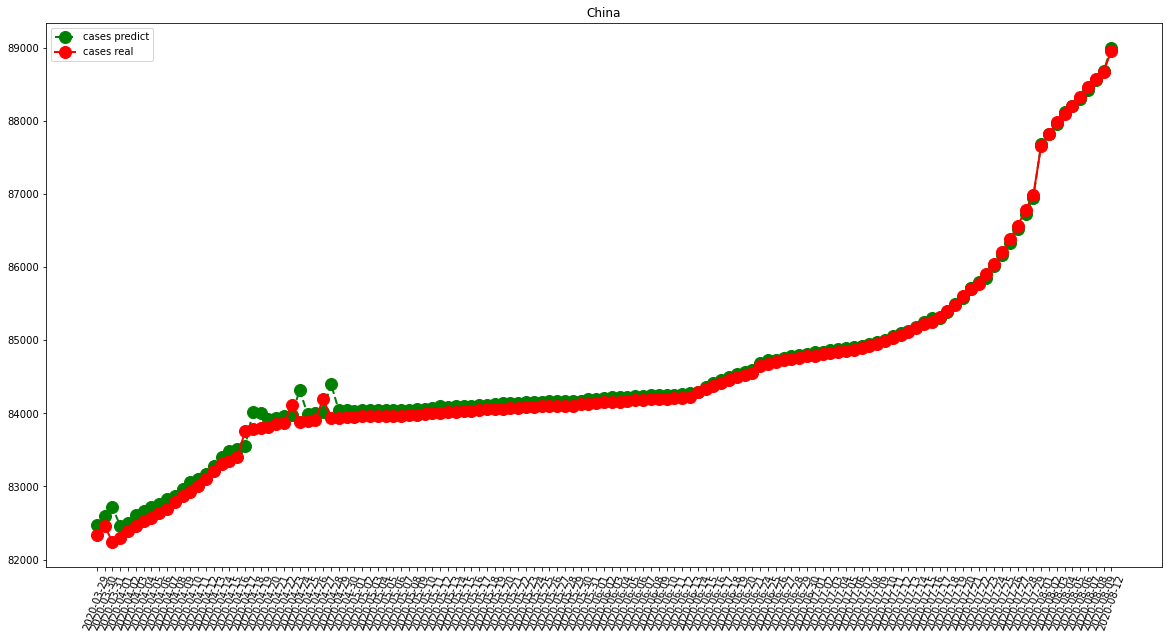

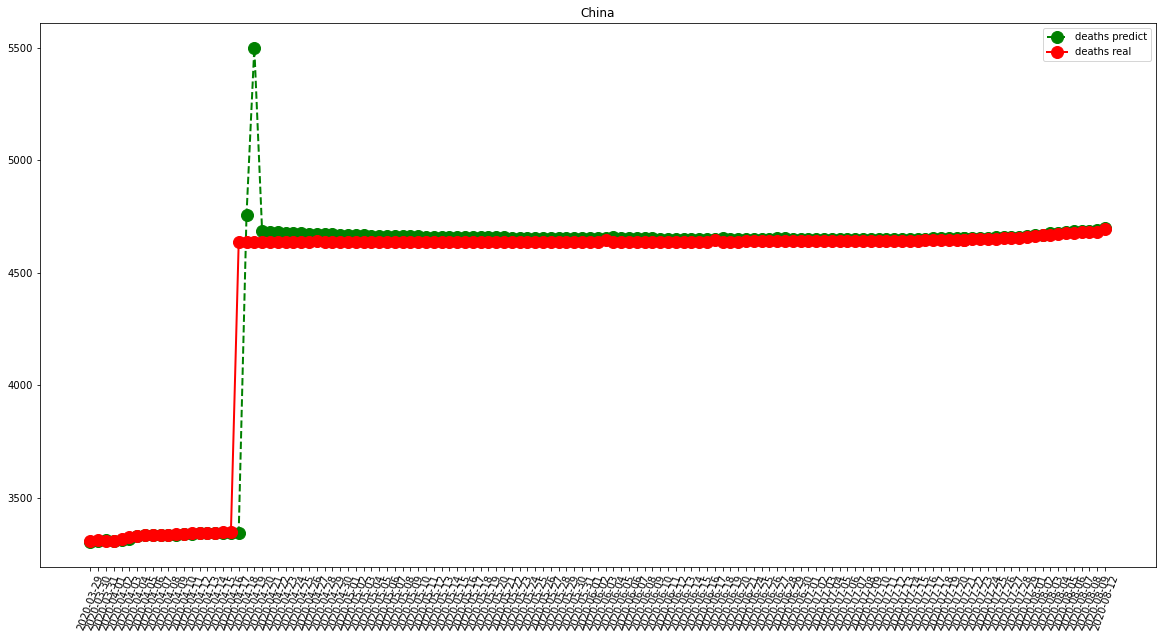

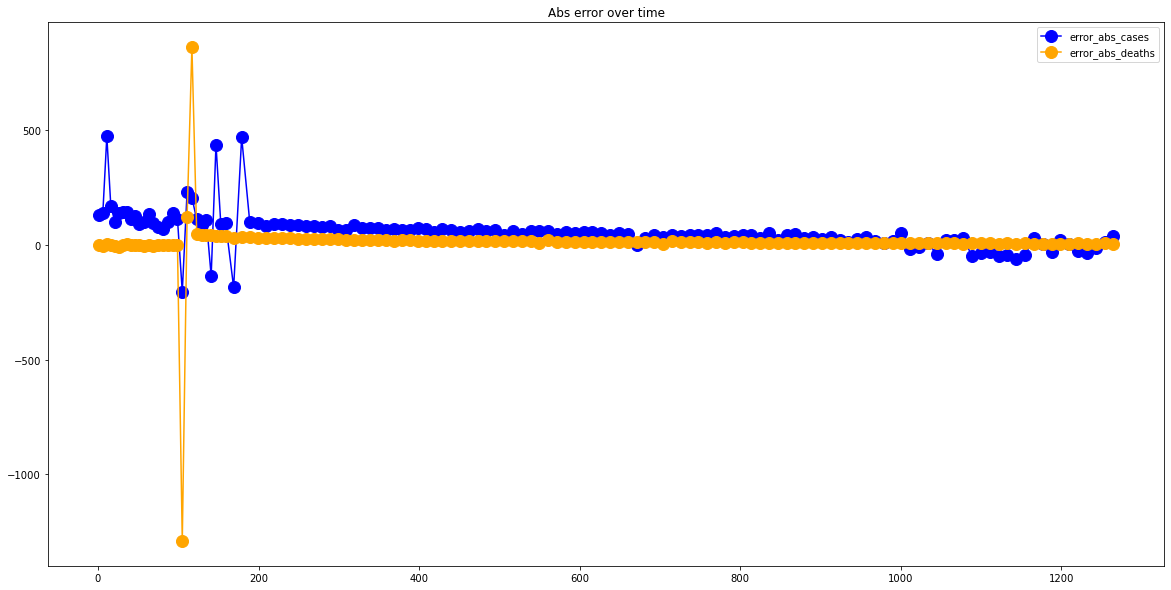

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1195.1153846153845
RMSE =  4093.0899767403484
-- United Kingdom performances for deaths --
MAE =  188.70192307692307
RMSE =  481.7011222260606


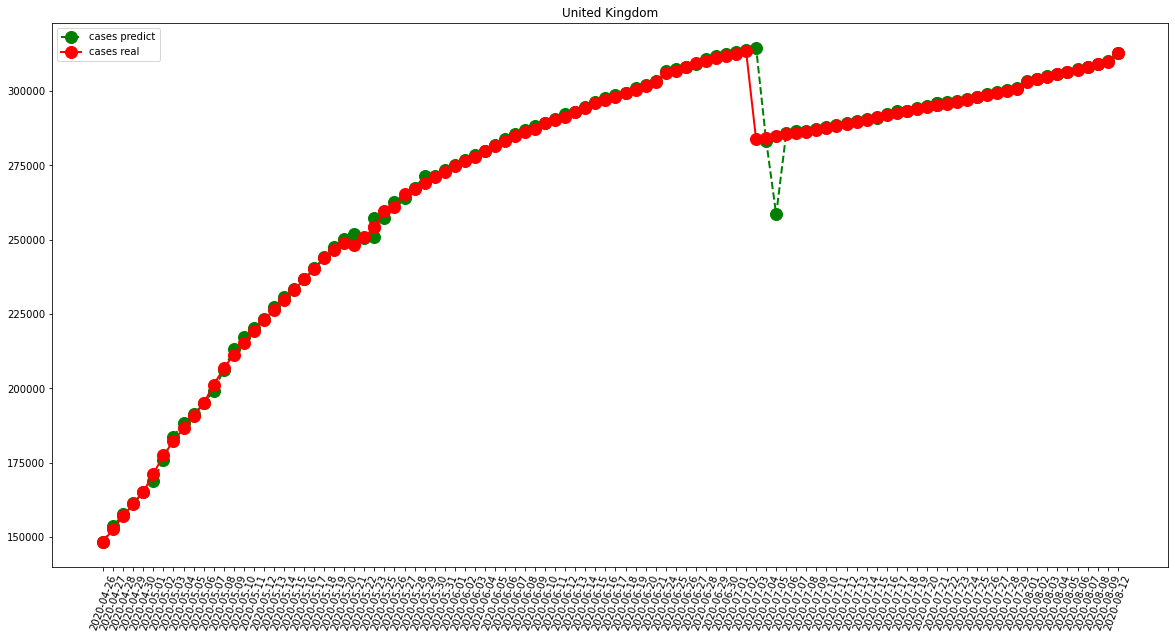

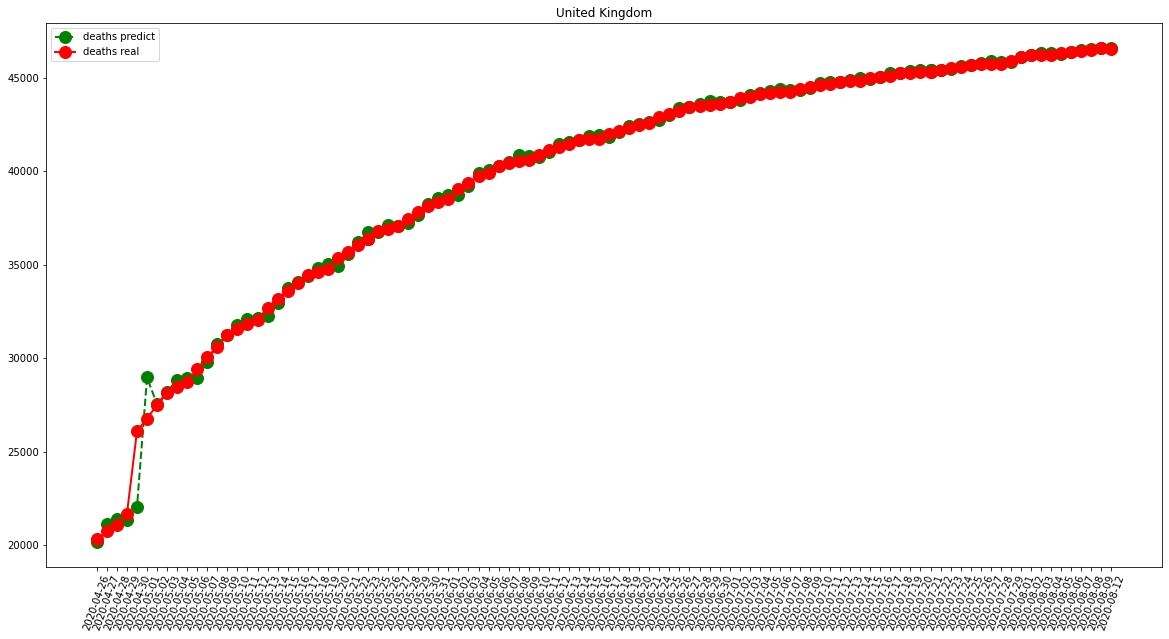

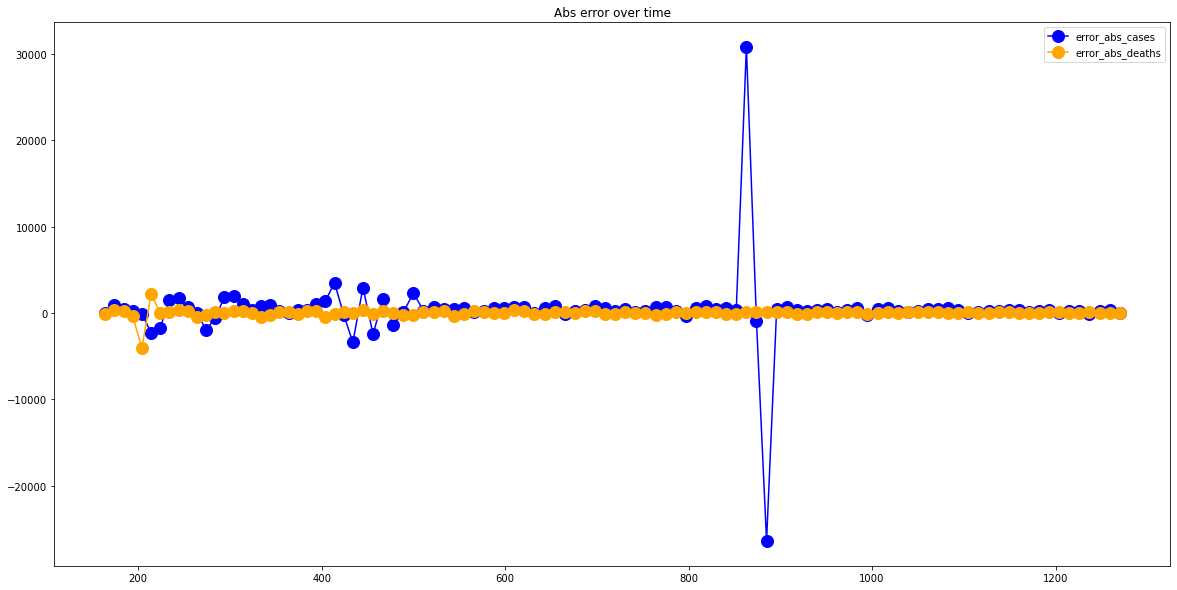

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  318.59615384615387
RMSE =  443.05653832648284
-- Germany performances for deaths --
MAE =  23.807692307692307
RMSE =  42.947866428604236


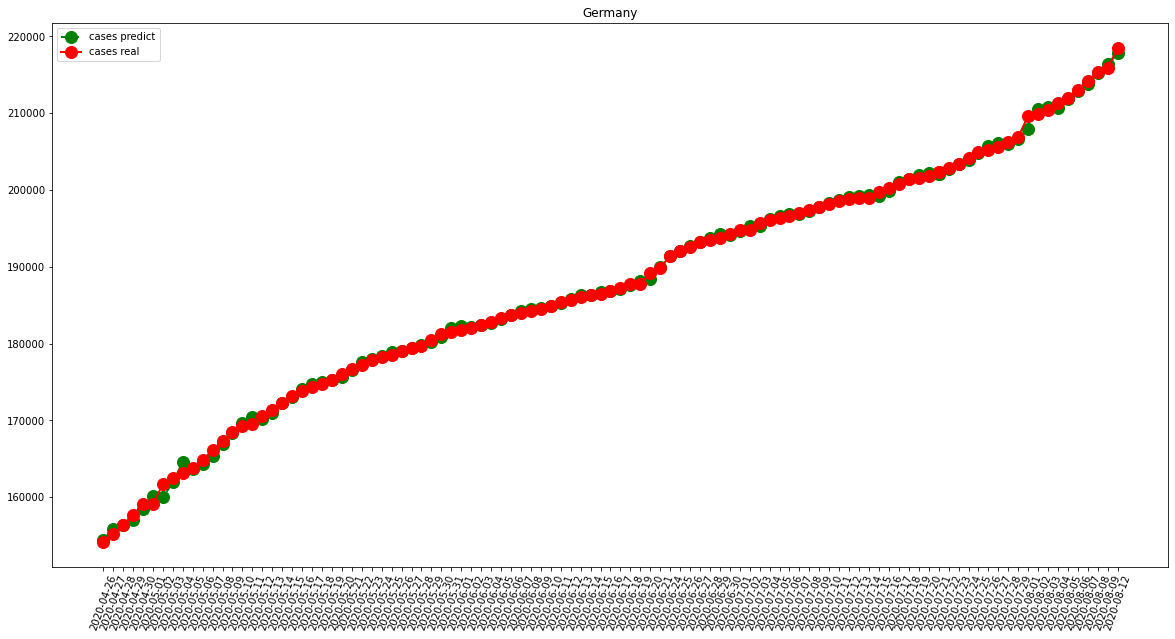

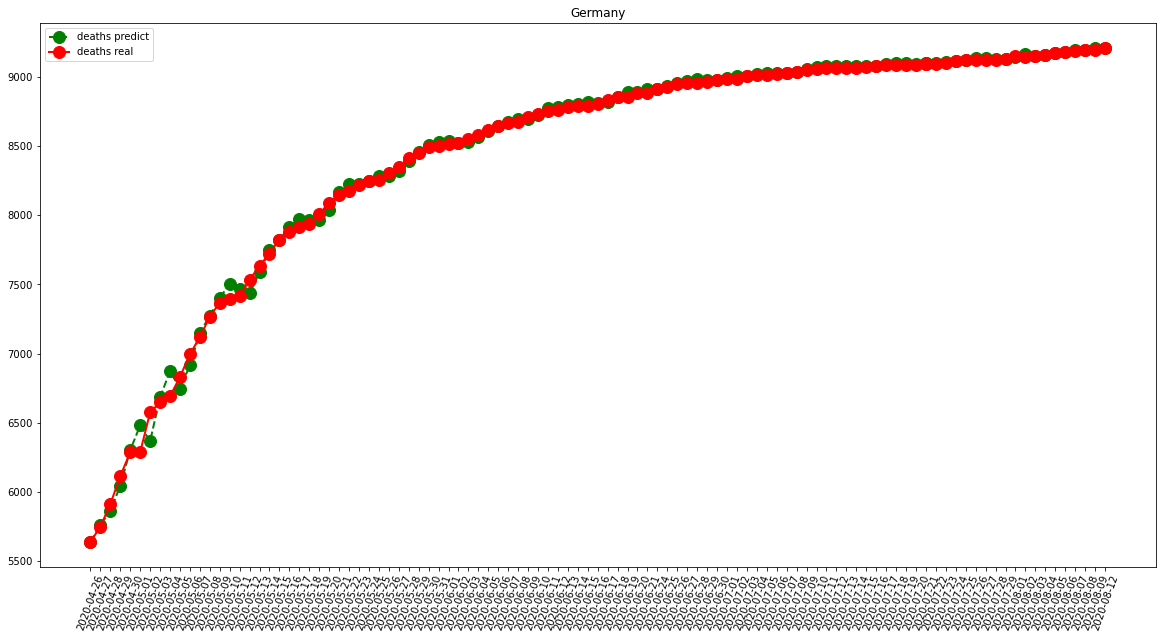

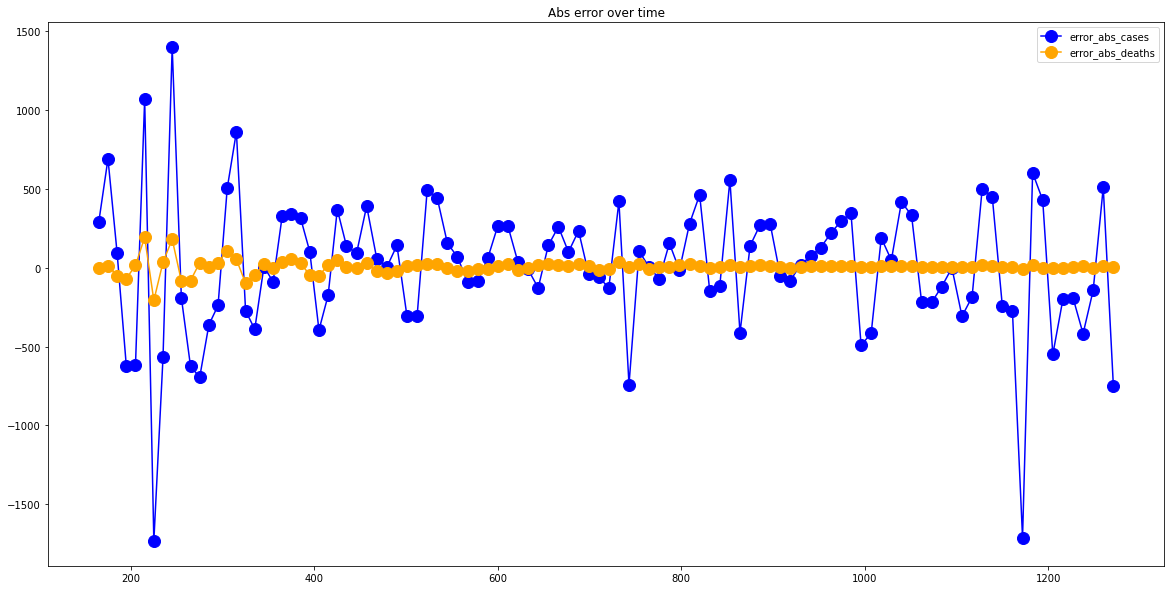

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  598.8942307692307
RMSE =  900.610439347412
-- Iran performances for deaths --
MAE =  31.884615384615383
RMSE =  70.08950321937274


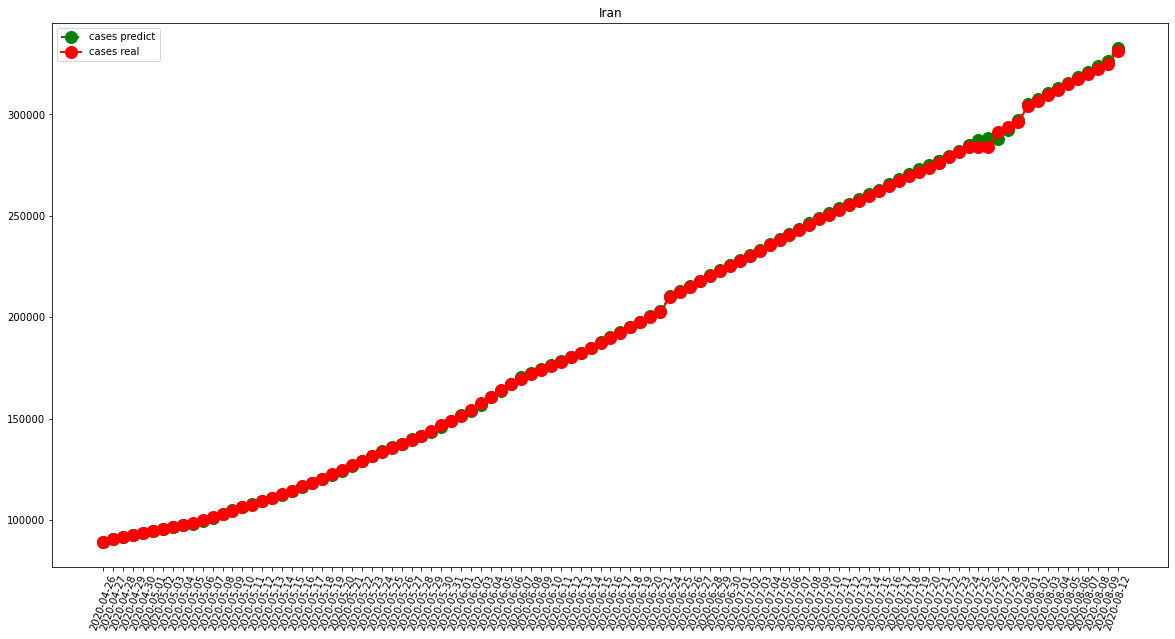

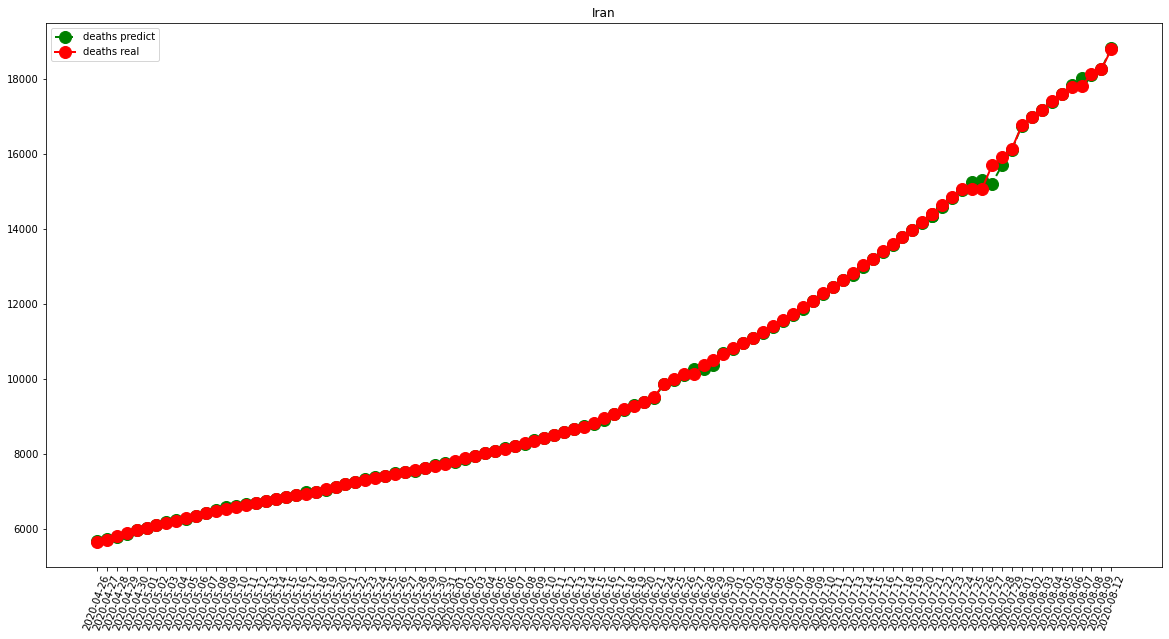

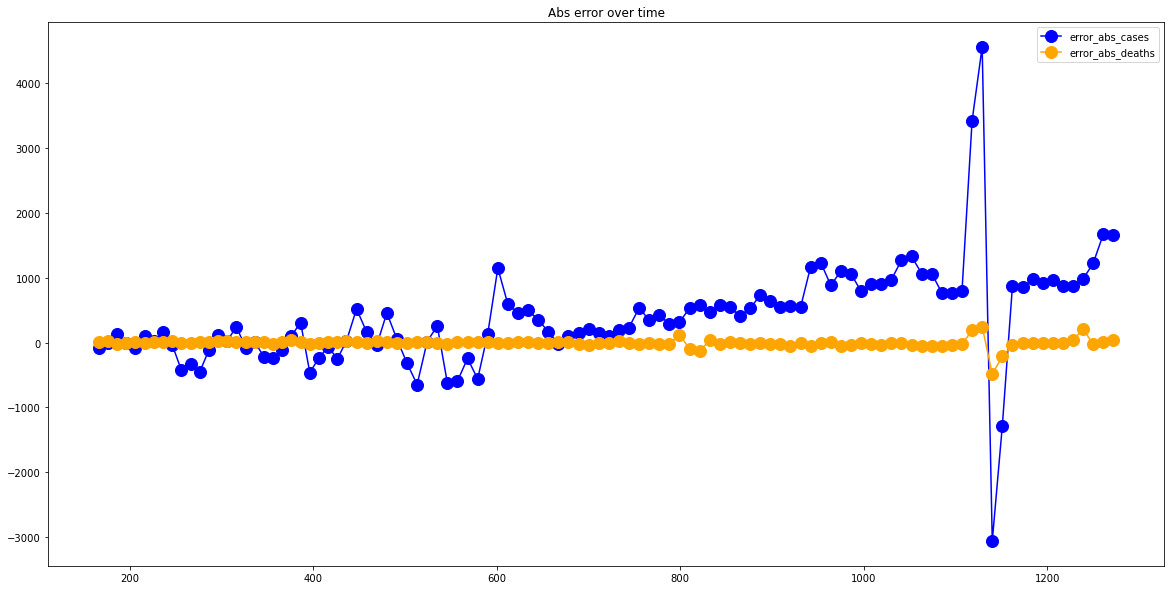

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  198.8846153846154
RMSE =  340.0281945323403
-- Turkey performances for deaths --
MAE =  18.326923076923077
RMSE =  99.54057927838738


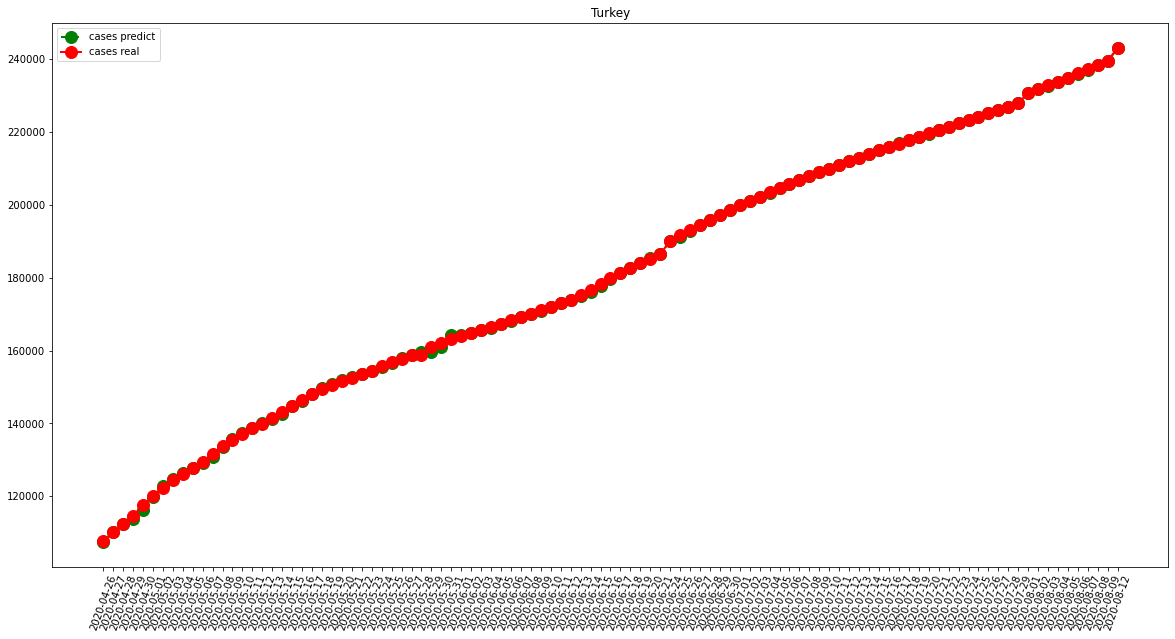

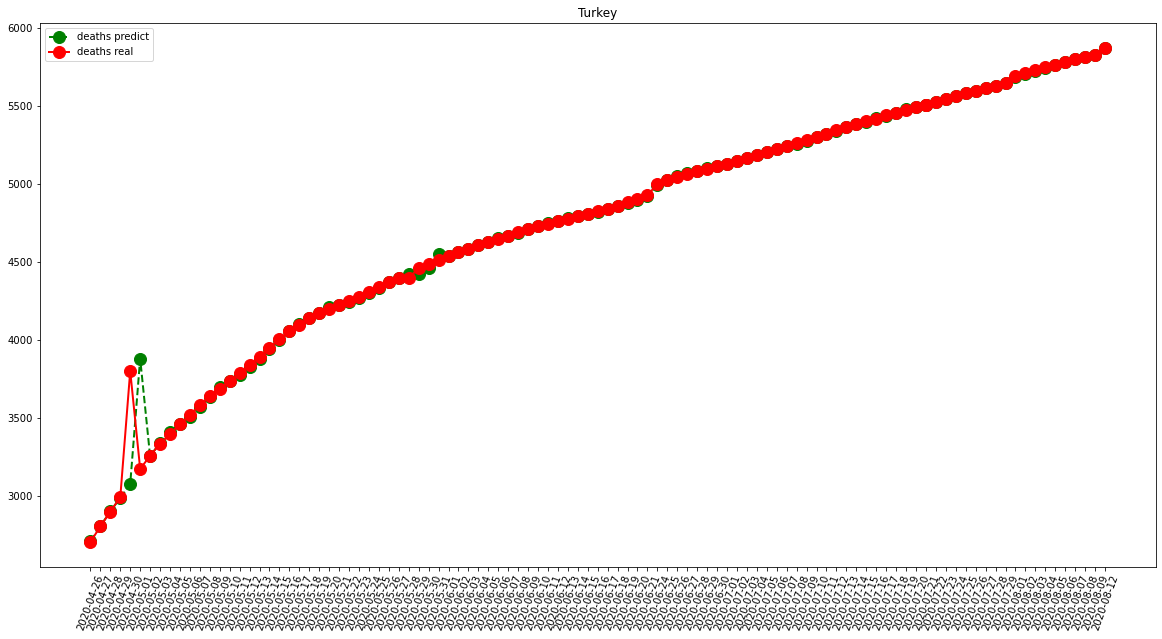

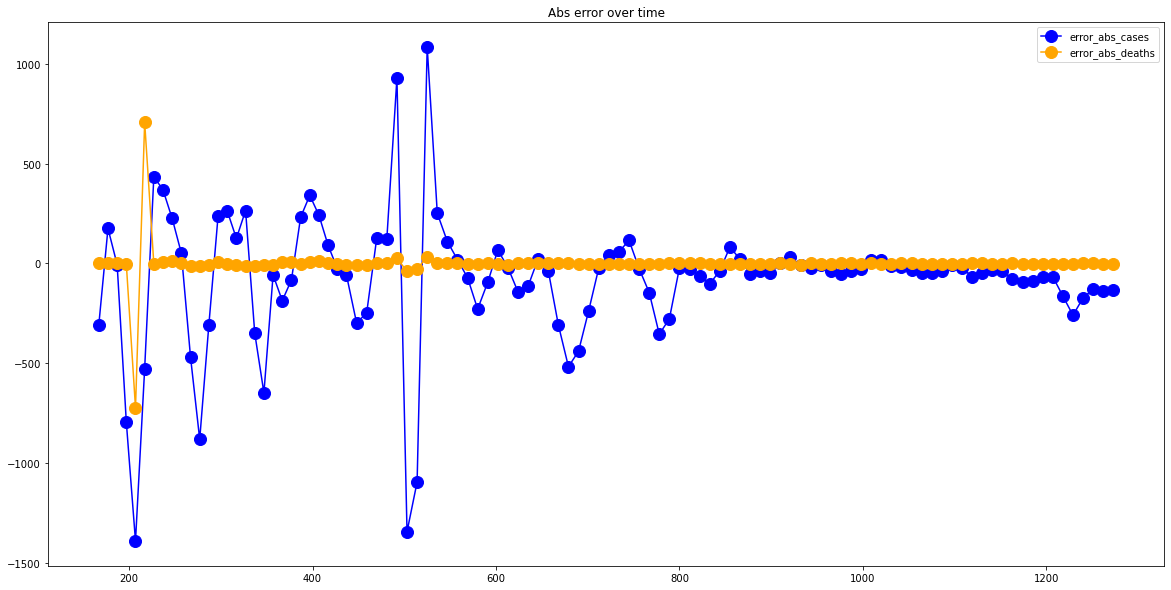

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11906.558441558442
RMSE =  15804.236883428837
-- Brazil performances for deaths --
MAE =  398.7012987012987
RMSE =  489.8114134840273


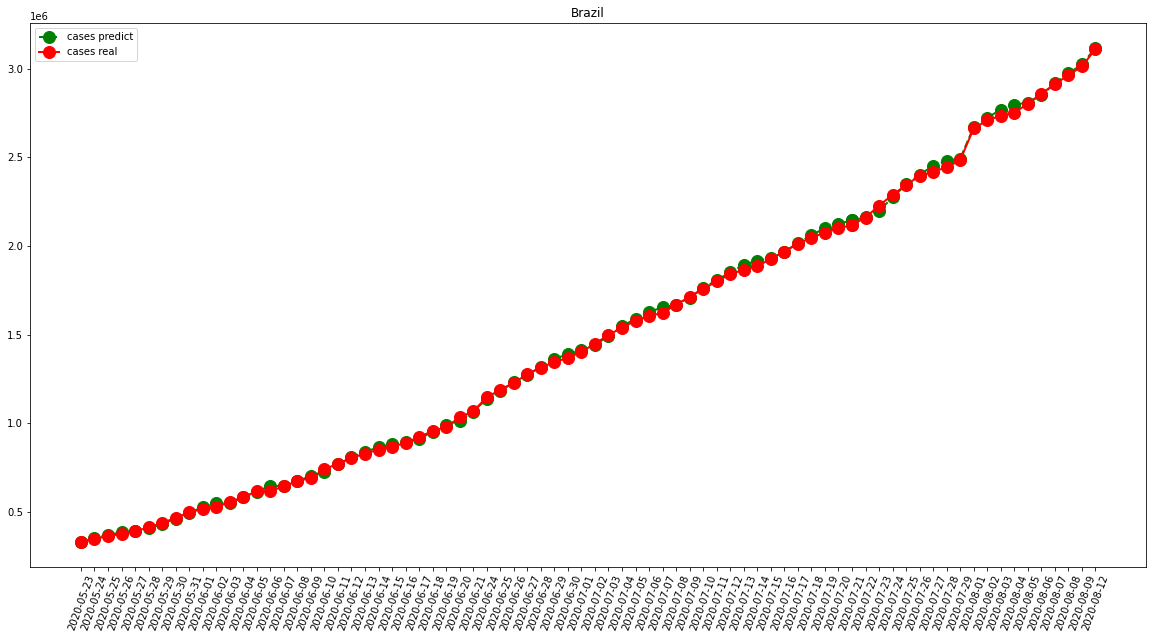

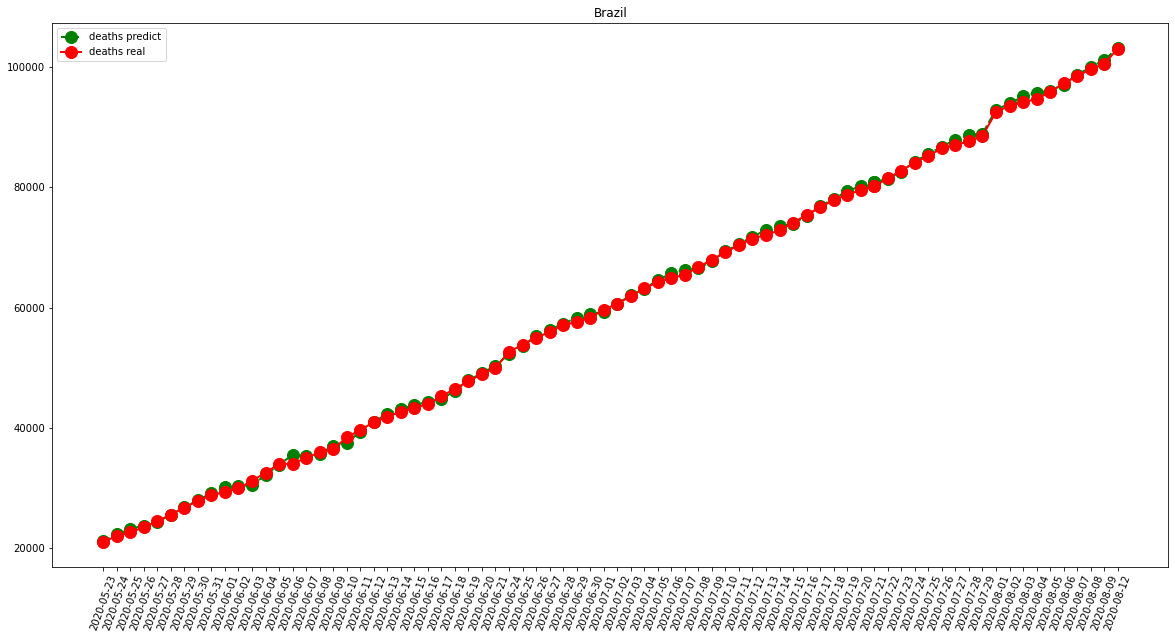

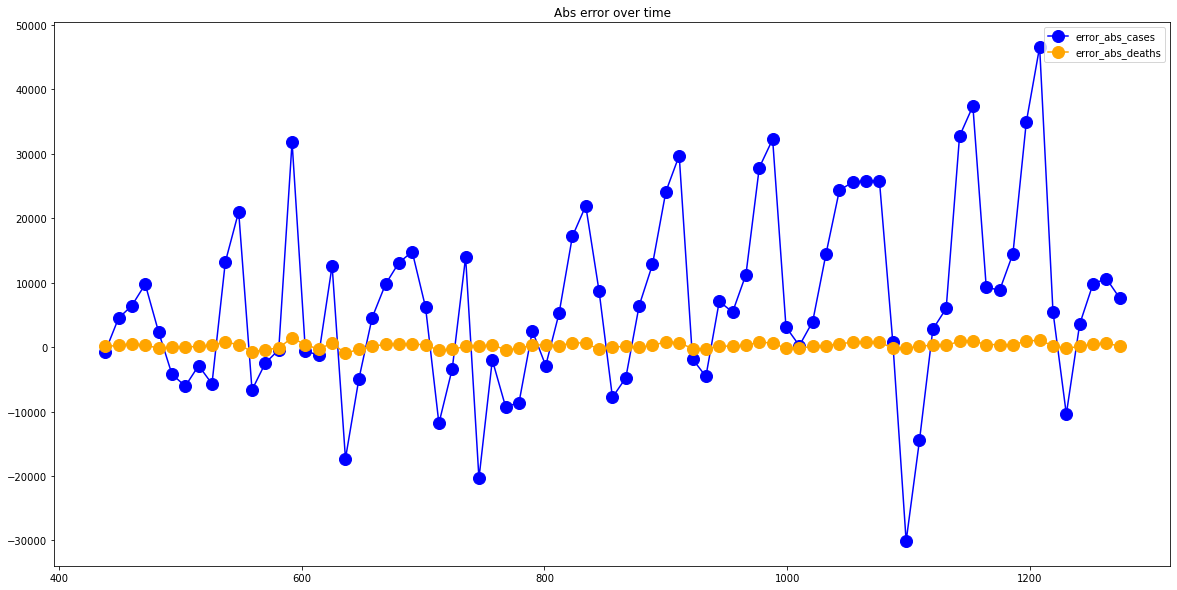

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)